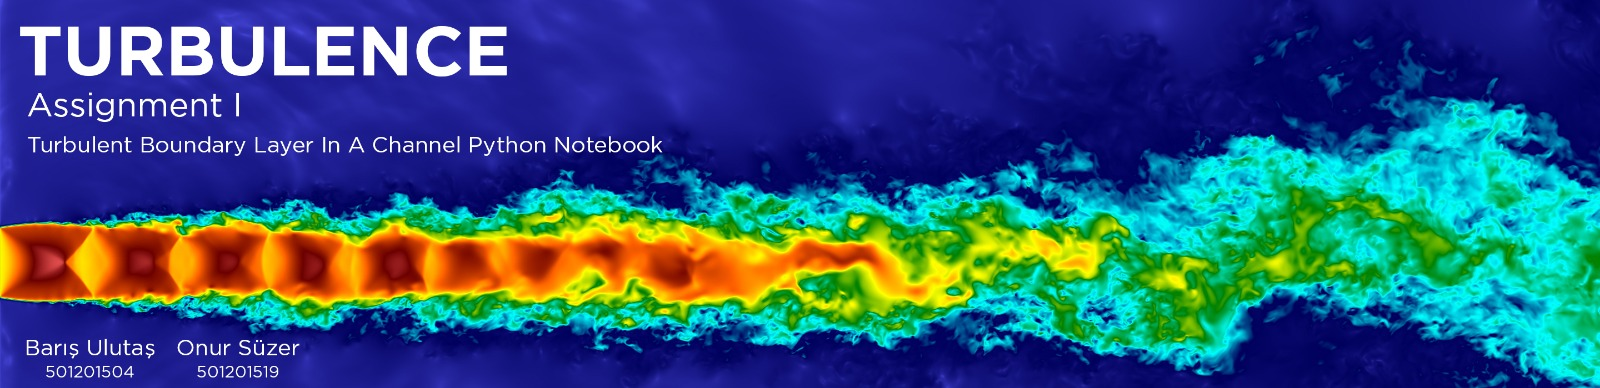

#In this python notebook, the questions asked were answered by using the experimental data set within the scope of the turbulence lesson Assignment I. Some questions is solved by Excel and visualized by Python.

In [95]:
#Kütüphaneler yüklendi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [96]:
dataFrame=pd.read_excel("turbulence.xlsx") # ölçüm verisi excelden import edildi.

In [103]:
dataFrame["LDA2 [m/s]"]=-1*dataFrame["LDA2 [m/s]"] # v doğrultusundaki hız -1 ile çarpıldı. Deney sırasında cihazın yerleşiminden kaynaklı.
t=dataFrame["AT [ms]"]/10**3
x1, y1 = [6.048/10**3, 180014.544/10**3], [u_mean, u_mean]# ortalama hızları grafik üstünde çiz
x2, y2 = [6.048/10**3, 180014.544/10**3], [v_mean, v_mean]


In [104]:
u_mean=dataFrame["LDA1 [m/s]"].mean()
v_mean=dataFrame["LDA2 [m/s]"].mean()
u_mean
v_mean

0.0004019149189704492

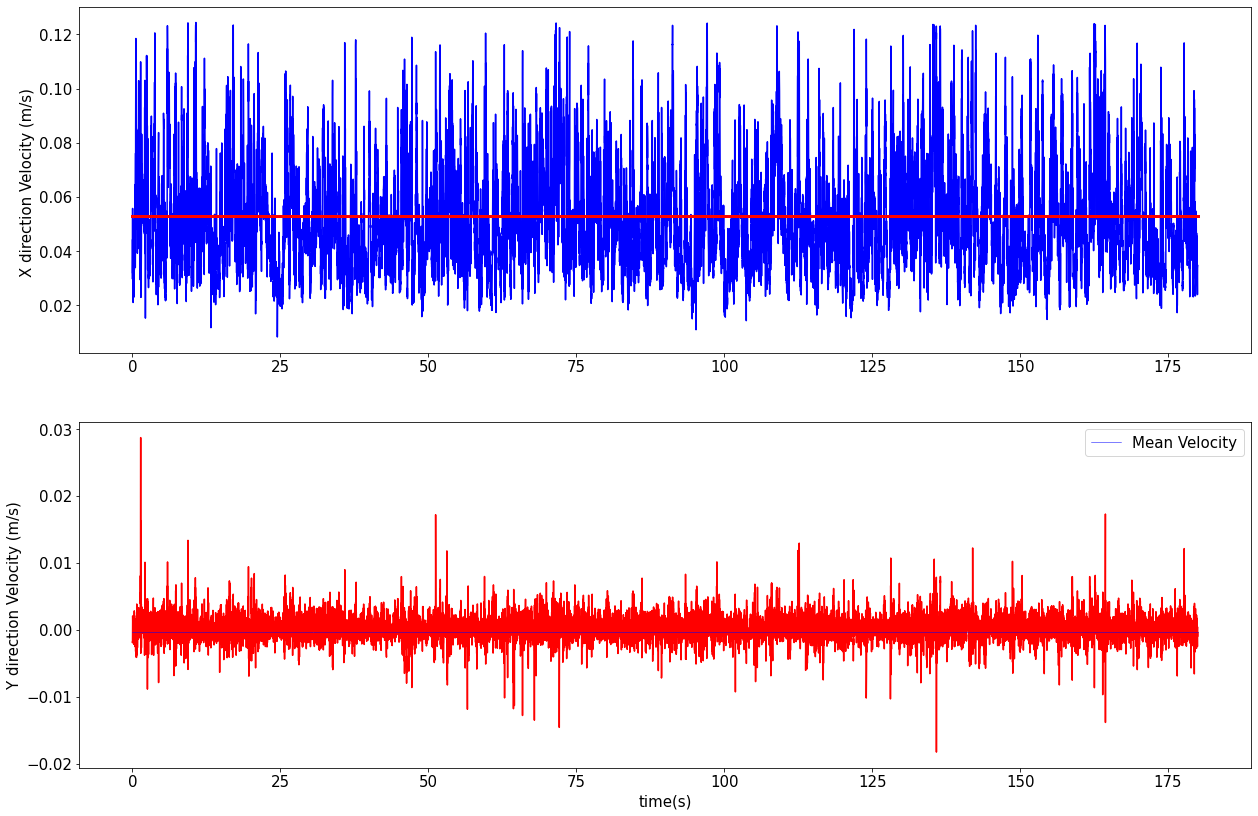

In [109]:
plt.rcParams.update({'font.size': 15})
fig, ax=plt.subplots(2,1,figsize=(21,14))

ax[0].plot(t, dataFrame["LDA1 [m/s]"],color='b')
ax[0].plot(x1,y1,color='r',linewidth=3.0,label='Mean Velocity')
ax[1].plot(t, dataFrame["LDA2 [m/s]"],color='r')
ax[1].plot(x2,y2,color='b',linewidth=0.5,label='Mean Velocity')
ax[0].set_ylabel("X direction Velocity (m/s) ")
ax[1].set_ylabel("Y direction Velocity (m/s)")
ax[1].set_xlabel("time(s)")
plt.legend()

#1. Plot the mean velocity $\overline{u}$ as function of y, and identify the different regions of the flow.

In [ ]:
dataFrame4=pd.read_excel("re_stress.xlsx")
dataFrame4

Text(0, 0.5, '$\\overline{u}$ (m/s)')

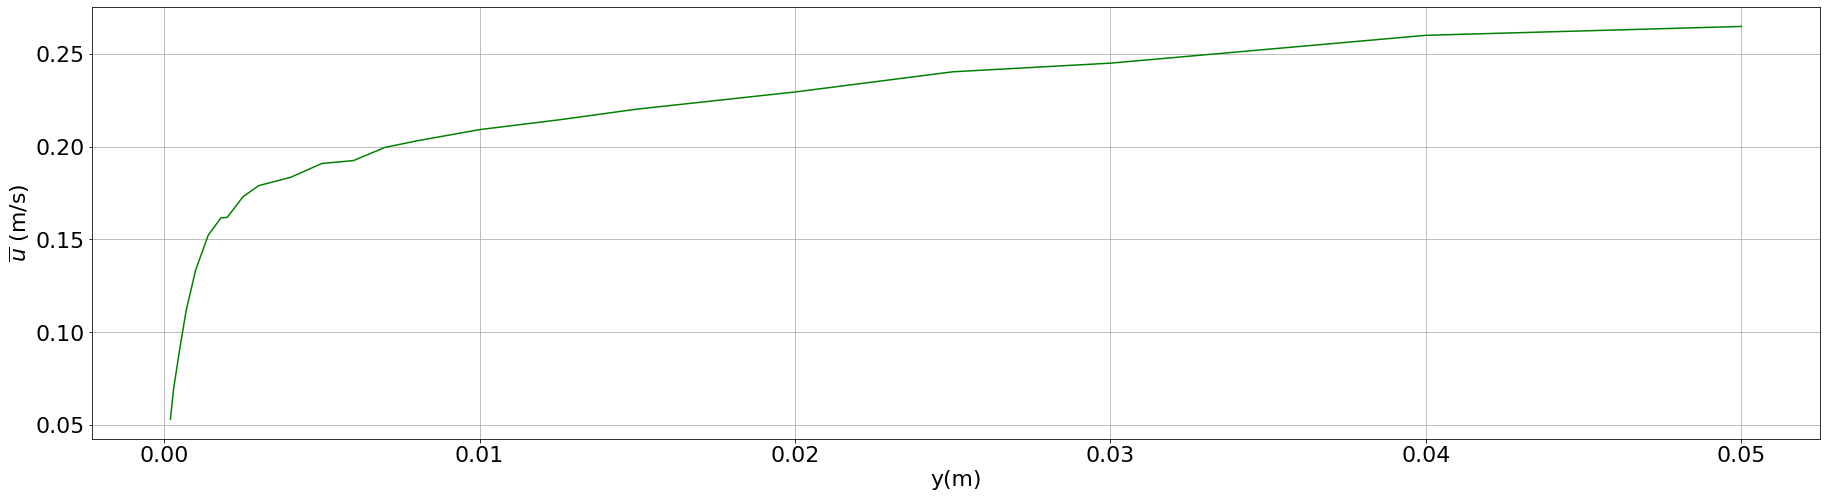

In [92]:
plt.rcParams.update({'font.size': 22})   #her bir yüksekliğinde yapılan ölçümlerinin ortalamaları alınarak hesaplandı 
Figur1=plt.figure()
figureAxes1 = Figur1.add_axes([1,1,4,1.5])
figureAxes1.plot(dataFrame4.iloc[:,1],dataFrame4.iloc[:,3],"g"); plt.grid()
figureAxes1.set_xlabel("y(m)")
figureAxes1.set_ylabel("$\overline{u}$ (m/s)")

#2. Predict the cross-sectional average velocity V from the previous diagram.

In [36]:
V=dataFrame4.iloc[:,3].mean() # 2. onculdeki grafikteki ortalama hız dağılımından kesit ortalama hızı bulundu.
V

0.1799752826086957

# 3. Calculating the bed friction velocity $U_f$ from the Darcy Weisbach equation:
#  $ U_f=\sqrt{\frac{f}{2}}V$
##   where $f$ is the friction coefficient, and is calculated from the Blasius formula: $f=\frac{0.0557}{Re^{0.25}}$


In [128]:
water_depth=0.0655 #water depth(m)
channel_width=0.3 #channel width (m)
R=(water_depth*channel_width)/(channel_width+2*water_depth) #Hydraulics radius
Re=R*V/10**-6
f=0.0557/(Re**0.25) #Blasius equation
U_f= V*(f/2)**0.5  #friction velocity m/s
U_f
         

0.009735610610665427

#4. Plot u on a semi-log paper. By fitting a straight line to the #logarithmic-layer
#portion of the velocity distribution, calculate $U_f$ . Compare this $U_f$ with that
#in the previous step.

In [129]:
y=dataFrame4.iloc[:,1] #Data frameden y yükseklikleri 

U_mean=dataFrame4.iloc[:,3] # her bir y yüksekliğine karşılık ortalama u hızları

  

In [130]:
log_y=np.log10(y) #logaritmik y değerleri

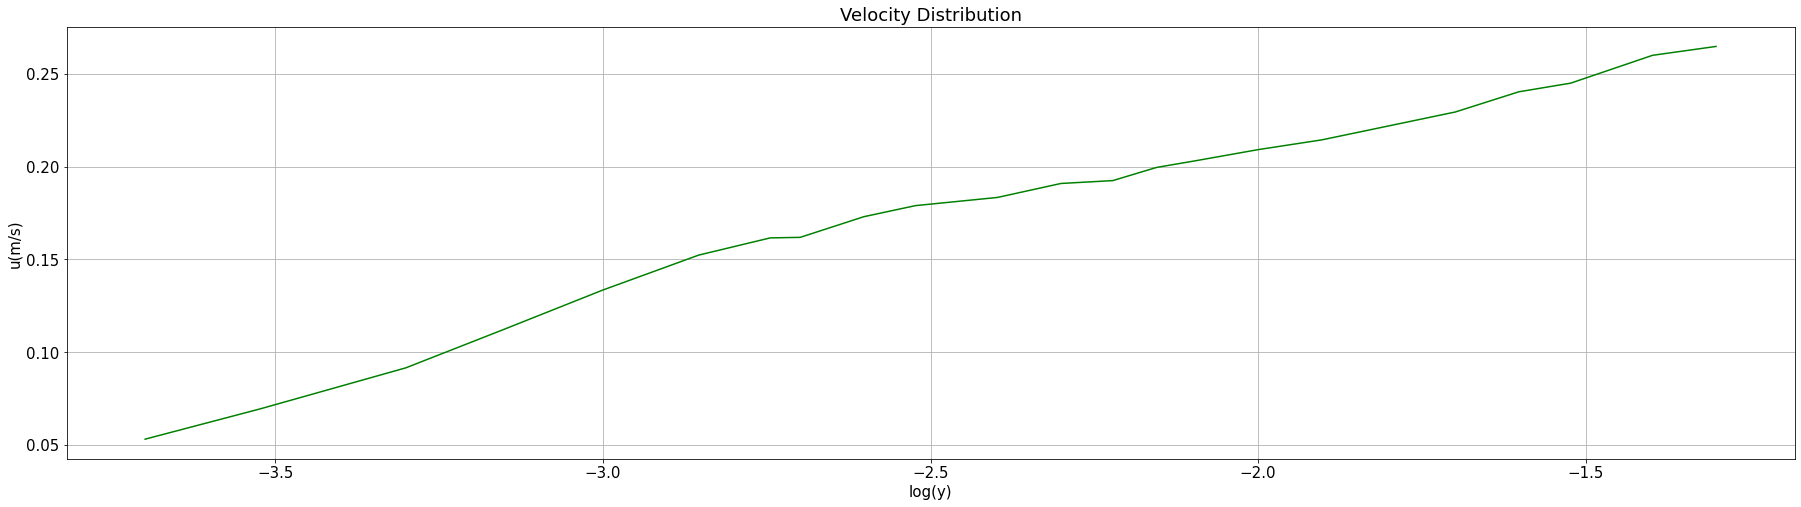

In [131]:
Figur2=plt.figure()
figureAxes2 = Figur2.add_axes([1,1,4,1.5])
figureAxes2.plot(log_y,U_mean,"g"); plt.grid()
figureAxes2.set_xlabel("log(y)")
figureAxes2.set_ylabel("u(m/s)")
figureAxes2.set_title("Velocity Distribution")
plt.autoscale()

#Plot the van Driest velocity distribution: $\frac{\bar{u}}{U_{f}}=2 \int_{0}^{y^{+}} \frac{d y^{+}}{1+\left\{1+4 \kappa^{2} y^{+2}\left[1-\exp \left(-\frac{y^{+}}{A}\right)\right]^{2}\right\}^{1 / 2}}$

In [132]:
dataFrame2=pd.read_excel("vandriest.xlsx") #Excelde hesaplandı. hesaplar tablo olarak import edildi. Denklem numerik olarak excelde çözüldü. Sonuçlar pythonda görselleştirildi.

In [133]:
dataFrame2

,y+,dy+,d(u/Uf)/dy+,u/Uf,vis_sub_layer,log_layer
0,0.000000,0.100000,1.000000,0.000000,0.000000,NaN
1,0.100000,0.005000,1.000000,0.100000,0.100000,NaN
2,0.105000,0.005250,1.000000,0.105000,0.105000,NaN
3,0.110250,0.005513,1.000000,0.110250,0.110250,NaN
4,0.115763,0.005788,1.000000,0.115762,0.115763,NaN
...,...,...,...,...,...,...
193,1170.429937,58.521497,0.002134,23.175358,NaN,22.762816
194,1228.951434,61.447572,0.002032,23.300225,NaN,22.884791
195,1290.399005,64.519950,0.001936,23.425098,NaN,23.006767
196,1354.918955,67.745948,0.001843,23.549977,NaN,23.128742


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instan

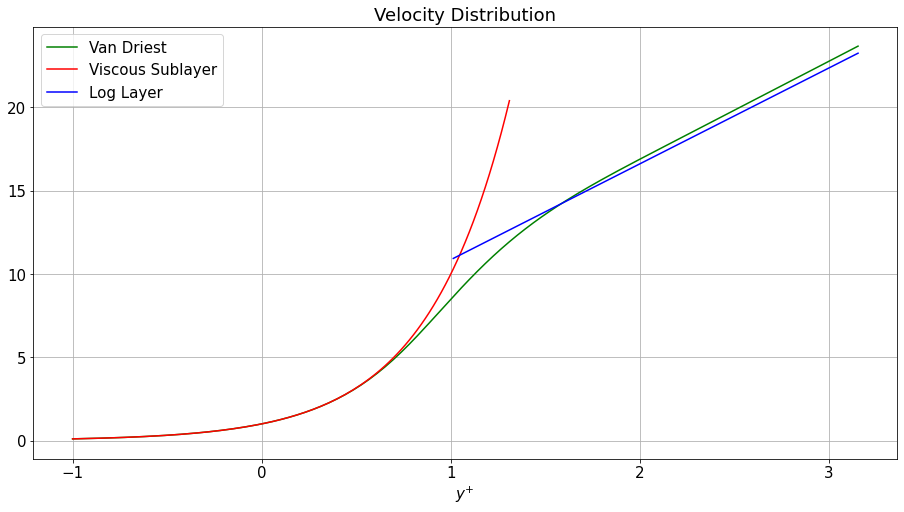

In [134]:
Figur3=plt.figure()
figureAxes3 = Figur3.add_axes([1,1,2,1.5])
figureAxes3.plot(np.log10(dataFrame2['y+']),dataFrame2['u/Uf'],"g",label='Van Driest'); plt.grid()
figureAxes4 = Figur3.add_axes([1,1,2,1.5])
figureAxes4.plot(np.log10(dataFrame2['y+']),dataFrame2['vis_sub_layer'],"r",label='Viscous Sublayer'); plt.grid()
figureAxes5 = Figur3.add_axes([1,1,2,1.5])
figureAxes5.plot(np.log10(dataFrame2['y+']),dataFrame2['log_layer'],"b",label='Log Layer'); plt.grid()
figureAxes3.set_xlabel("$y^{+}$")
figureAxes3.set_title("Velocity Distribution")
plt.savefig("vandriest.pdf")
plt.legend()

#6. Plot the turbulence data in wall units, namely, $\overline{u^{\prime} v^{\prime}} / U_{f}^{2}$,  $\sqrt{\overline{{u^{\prime}}^2}} / U_{f}$, $\sqrt{\overline{{v^{\prime}}^2}} / U_{f}$

In [135]:
dataFrame3=pd.read_excel("turb_hiz.xlsx")  #data seti tek bir excelde birleştirildi. Import edildi.


In [136]:
dataFrame3 #import edilen veri seti. sağdan sola doğru y artıyor.

,LDA1 [m/s],LDA2 [m/s],LDA1 [m/s].1,LDA2 [m/s].1,LDA1 [m/s].2,LDA2 [m/s].2,LDA1 [m/s].3,LDA2 [m/s].3,LDA1 [m/s].4,LDA2 [m/s].4,LDA1 [m/s].5,LDA2 [m/s].5,LDA1 [m/s].6,LDA2 [m/s].6,LDA1 [m/s].7,LDA2 [m/s].7,LDA1 [m/s].8,LDA2 [m/s].8,LDA1 [m/s].9,LDA2 [m/s].9,LDA1 [m/s].10,LDA2 [m/s].10,LDA1 [m/s].11,LDA2 [m/s].11,LDA1 [m/s].12,LDA2 [m/s].12,LDA1 [m/s].13,LDA2 [m/s].13,LDA1 [m/s].14,LDA2 [m/s].14,LDA1 [m/s].15,LDA2 [m/s].15,LDA1 [m/s].16,LDA2 [m/s].16,LDA1 [m/s].17,LDA2 [m/s].17,LDA1 [m/s].18,LDA2 [m/s].18,LDA1 [m/s].19,LDA2 [m/s].19,LDA1 [m/s].20,LDA2 [m/s].20,LDA1 [m/s].21,LDA2 [m/s].21,LDA1 [m/s].22,LDA2 [m/s].22
0,0.04408,-0.00184,0.04365,0.00165,0.10843,-0.00379,0.09589,-0.00071,0.13730,0.00127,0.15072,0.00553,0.15810,-0.01111,0.14058,-0.00006,0.15353,-0.01038,0.13458,-0.01132,0.18310,0.00025,0.17887,0.00691,0.22573,0.01442,0.19438,0.00671,0.20496,0.00328,0.19486,0.00793,0.20925,0.01436,0.18967,-0.01378,0.24840,0.01859,0.22134,-0.01329,0.26613,0.00210,0.26649,0.00927,0.27537,0.00237
1,0.02970,-0.00195,0.04871,-0.00135,0.10328,-0.00214,0.09030,-0.00145,0.14629,-0.00159,0.15266,0.00265,0.16649,-0.01193,0.13920,0.00020,0.15391,-0.00827,0.13412,-0.01132,0.18230,-0.00422,0.17396,0.00866,0.21323,0.00755,0.18805,0.01010,0.21119,0.00907,0.20689,0.00605,0.20231,0.01268,0.19128,-0.03002,0.24838,0.01726,0.22347,-0.01109,0.25749,-0.00016,0.26987,0.00740,0.27531,0.00473
2,0.05324,-0.00115,0.04817,0.00093,0.10995,0.00096,0.08413,0.00466,0.14260,0.00038,0.15302,0.00692,0.14824,-0.01069,0.13954,-0.00047,0.15443,-0.00863,0.11522,-0.01167,0.18770,-0.00389,0.19619,0.00264,0.21173,-0.00293,0.19665,0.00905,0.21065,0.00907,0.20093,0.00605,0.20553,0.01032,0.19150,-0.01925,0.23648,0.01790,0.22418,-0.01009,0.25794,0.00030,0.27009,0.00783,0.28006,0.00371
3,0.05578,-0.00085,0.05471,0.00182,0.11263,-0.00193,0.08374,-0.00366,0.14842,-0.00010,0.14783,0.00397,0.14879,-0.00910,0.13131,-0.00387,0.15680,-0.00915,0.13030,-0.01521,0.18842,-0.00826,0.18688,0.02136,0.22043,0.00013,0.18979,0.00746,0.20881,0.00225,0.20611,0.00394,0.20600,0.00898,0.18823,-0.01683,0.22677,0.02407,0.22468,-0.01196,0.24952,0.00030,0.27978,0.00646,0.27258,0.00722
4,0.03186,0.00207,0.04658,0.00113,0.11732,-0.00160,0.08666,-0.00098,0.15203,-0.00291,0.15504,0.00283,0.17345,-0.01069,0.13082,-0.00299,0.14554,-0.01079,0.13073,-0.01412,0.19269,-0.01046,0.18641,0.02136,0.21957,-0.00282,0.18164,0.00135,0.20851,0.01204,0.20774,0.01319,0.20110,0.00203,0.19713,-0.01683,0.22793,0.02038,0.22665,-0.01373,0.26078,0.00182,0.26846,0.01290,0.27925,0.00420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23119,-0.00853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.22937,0.00144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.22941,-0.00312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23291,0.00328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
y_plus=y*U_f/(10**-5) #y^+lar hesaplandı

In [138]:
uv_dash=[]
udash_kare=[]
vdash_kare=[]
i=0
while i<45:
  u=dataFrame3.iloc[:,i]
  v=dataFrame3.iloc[:,i+1]*-1
  u_dash=u-u.mean()
  v_dash=v-v.mean()
  uv_dash.append((((u_dash*v_dash).mean()))/(U_f**2))
  udash_kare.append((((u_dash*u_dash).mean())**0.5)/(U_f))
  vdash_kare.append((((v_dash*v_dash).mean())**0.5)/(U_f))
  i+=2

Text(0.5, 0, '$y^{+}$')

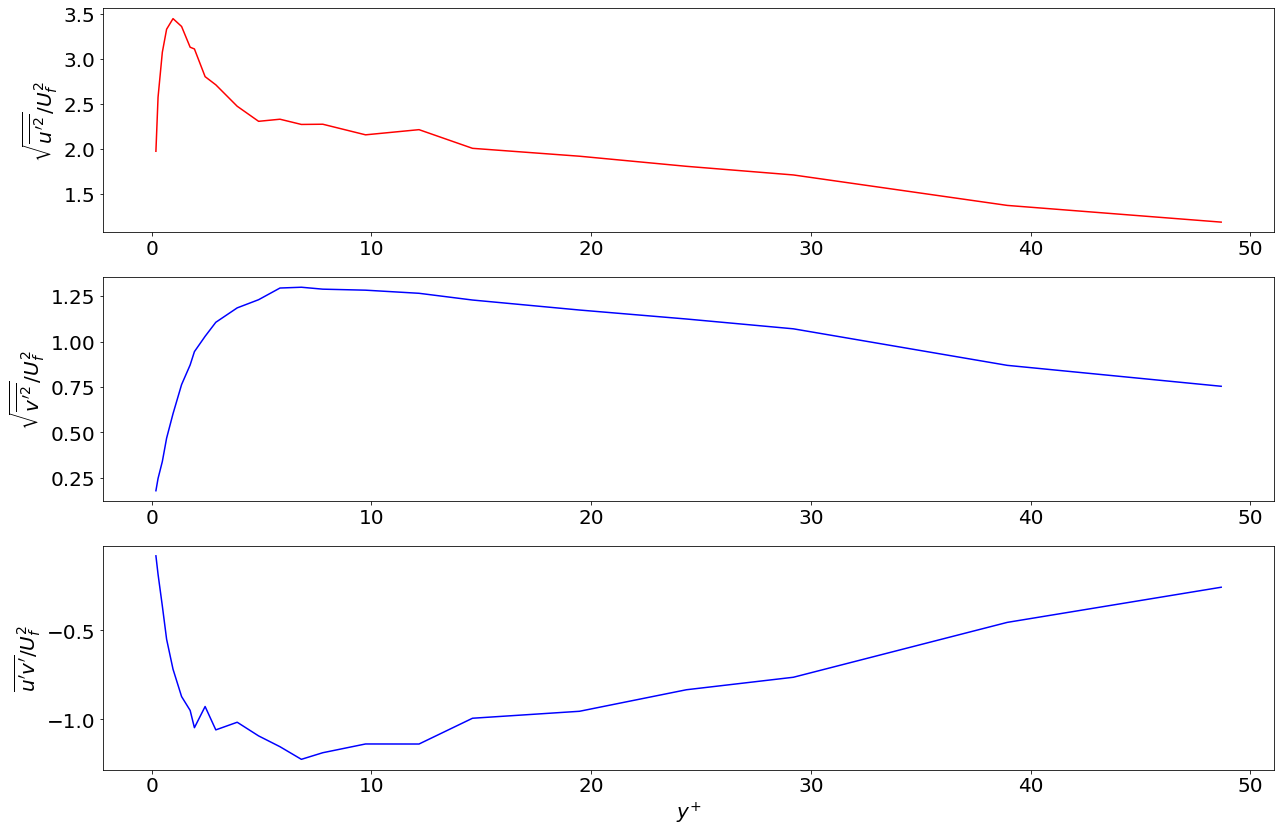

In [139]:
plt.rcParams.update({'font.size': 20})
fig6, ax6=plt.subplots(3,1,figsize=(21,14))
ax6[0].plot(y_plus,udash_kare ,color='r')
ax6[1].plot(y_plus,vdash_kare ,color='b')
ax6[2].plot(y_plus,uv_dash,color='b')


ax6[0].set_ylabel("$\sqrt{\overline{{u^{\prime}}^2}} / U_{f}^{2}$")
ax6[1].set_ylabel("$\sqrt{\overline{{v^{\prime}}^2}} / U_{f}^{2}$")
ax6[2].set_ylabel("$\overline{u^{\prime} v^{\prime}} / U_{f}^{2}$")
ax6[2].set_xlabel("$y^{+}$")





##7. Plot the turbulence data in outer units, namely, $\overline{u^{\prime} v^{\prime}} / U_{f}^{2}$,  $\sqrt{\overline{{u^{\prime}}^2}} / U_{f}$, $\sqrt{\overline{{v^{\prime}}^2}} / U_{f}$

Text(0.5, 0, '$y/h$')

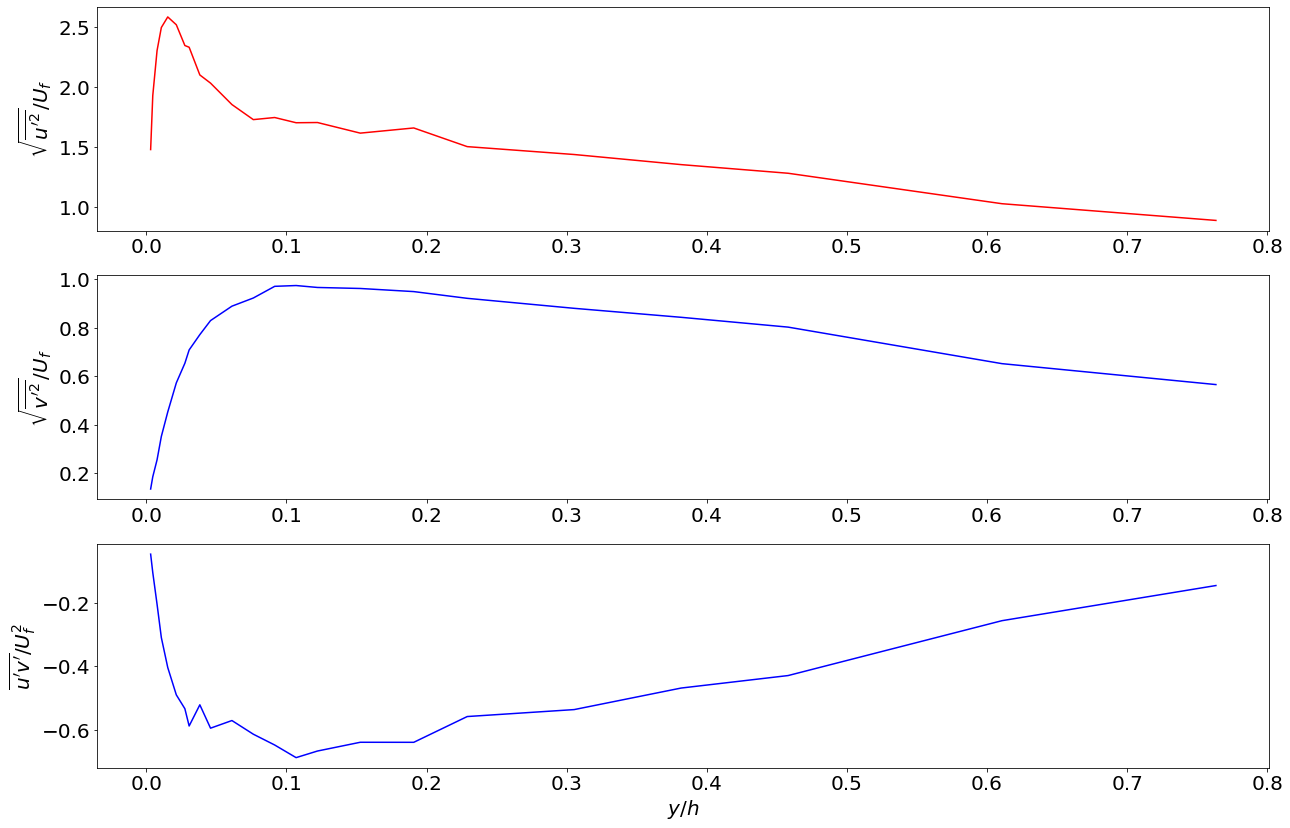

In [55]:
y_h=dataFrame4.iloc[:,2]
plt.rcParams.update({'font.size': 20})
fig6, ax6=plt.subplots(3,1,figsize=(21,14))
ax6[0].plot(y_h,udash_kare ,color='r')
ax6[1].plot(y_h,vdash_kare ,color='b')
ax6[2].plot(y_h,uv_dash,color='b')


ax6[0].set_ylabel("$\sqrt{\overline{{u^{\prime}}^2}} / U_{f}$")
ax6[1].set_ylabel("$\sqrt{\overline{{v^{\prime}}^2}} / U_{f}$")
ax6[2].set_ylabel("$\overline{u^{\prime} v^{\prime}} / U_{f}^{2}$")
ax6[2].set_xlabel("$y/h$")

#8. Also, do the same exercise for $\frac{k}{U_f^{2}}$ as function of $\frac{y}{h}$ in which $k =\overline{{u^{\prime}}^2}+\overline{{v^{\prime}}^2}$

In [56]:
k_uf=[]
i=0
while i<45:
  u=dataFrame3.iloc[:,i]
  v=dataFrame3.iloc[:,i+1]*-1
  u_dash=u-u.mean()
  v_dash=v-v.mean()
  k_uf.append(((u_dash*u_dash).mean()+(v_dash*v_dash).mean())/(U_f**2))
  i+=2





Text(0, 0.5, '$k/U_f^{2}$')

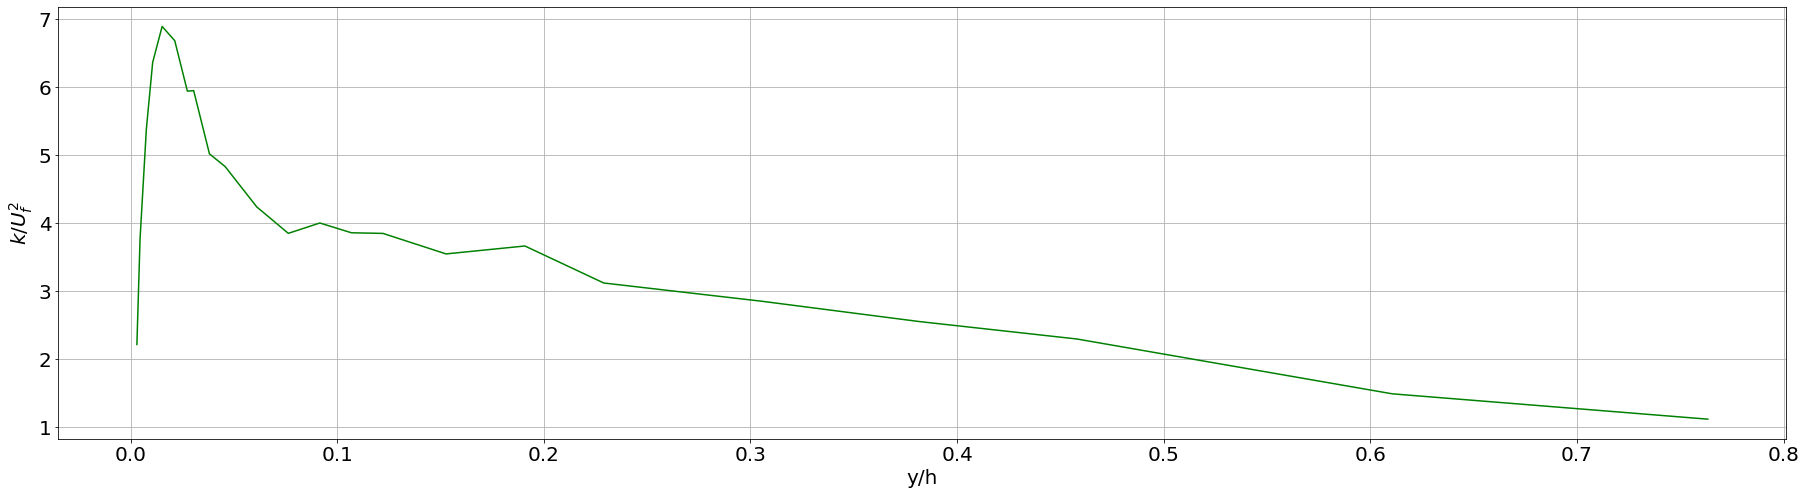

In [155]:

plt.rcParams.update({'font.size': 20})
Figur8=plt.figure()
figureAxes8 = Figur8.add_axes([1,1,4,1.5])
figureAxes8.plot(y_h,k_uf,"g"); plt.grid()
figureAxes8.set_xlabel("y/h")
figureAxes8.set_ylabel("$k/U_f^{2}$")


#9. Calculate the Reynolds stress through 

In [ ]:
dataFrame4=pd.read_excel("re_stress.xlsx") #Reynolds stresi veren diferansiyel denklem excelde hesaplandı import edildi


In [67]:
dataFrame4

,y (mm),y (m),y/h,u mean,adet,Unnamed: 5,Unnamed: 6,Unnamed: 7,u mean fark,y fark,Unnamed: 10,du/dy,To mean,Re_Stress,Non_dim_Re,Uf,0.01298
0,0.2,0.0002,0.003053,0.053074,25177,25176,1336.203612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.3,0.0003,0.004580,0.069442,28790,28789,1999.165738,NaN,0.016368,0.0001,NaN,163.6750,0.167709,0.004034,23.941859,NaN,NaN
2,0.5,0.0005,0.007634,0.091515,39269,39268,3593.611020,NaN,0.022073,0.0002,NaN,110.3650,0.167194,0.056829,337.305052,NaN,NaN
3,0.7,0.0007,0.010687,0.111749,40470,40469,4522.370281,NaN,0.020234,0.0002,NaN,101.1700,0.166680,0.065510,388.827698,NaN,NaN
4,1.0,0.0010,0.015267,0.133493,50838,50837,6786.383641,NaN,0.021744,0.0003,NaN,72.4800,0.165908,0.093428,554.534416,NaN,NaN
5,1.4,0.0014,0.021374,0.152294,47775,47774,7275.693556,NaN,0.018801,0.0004,NaN,47.0025,0.164879,0.117877,699.646916,NaN,NaN
6,1.8,0.0018,0.027481,0.161565,47262,47261,7635.723465,NaN,0.009271,0.0004,NaN,23.1775,0.163850,0.140673,834.951153,NaN,NaN
7,2.0,0.0020,0.030534,0.161852,47478,47477,7684.247404,NaN,0.000287,0.0002,NaN,1.4350,0.163336,0.161901,960.948338,NaN,NaN
8,2.5,0.0025,0.038168,0.172967,60901,60900,10533.690300,NaN,0.011115,0.0005,NaN,22.2300,0.162050,0.139820,829.887930,NaN,NaN
9,3.0,0.0030,0.045802,0.178968,63995,63994,11452.878192,NaN,0.006001,0.0005,NaN,12.0020,0.160764,0.148762,882.961700,NaN,NaN


Text(0.5, 1.0, 'Reynold Stress Graph')

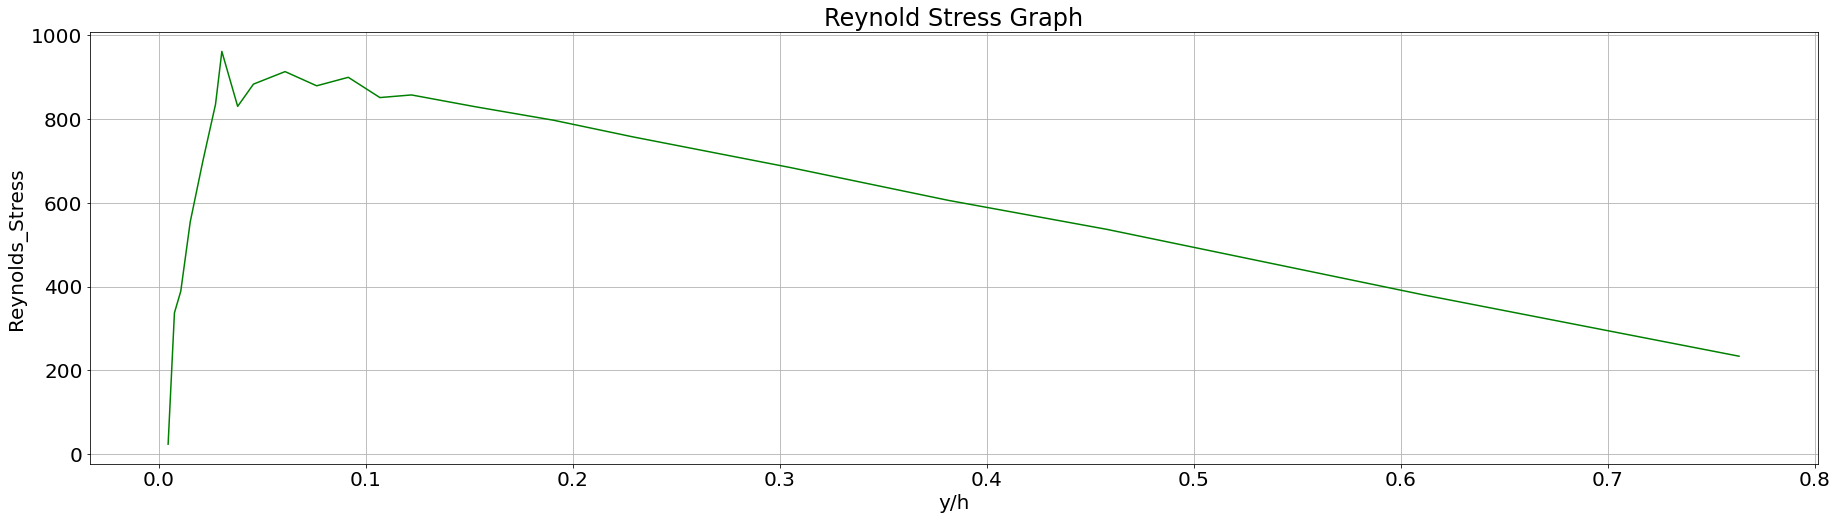

In [156]:
plt.rcParams.update({'font.size': 20})
Figur9=plt.figure()
figureAxes9 = Figur9.add_axes([1,1,4,1.5])
figureAxes9.plot(dataFrame4.iloc[:,2],dataFrame4.iloc[:,14],"g"); plt.grid()
figureAxes9.set_xlabel("y/h")
figureAxes9.set_ylabel("Reynolds_Stress")
figureAxes9.set_title("Reynold Stress Graph")

#10. Calculate the turbulence energy production and plot it as function of y/h.Write the energy equation for turbulence for the case you are studying.

Text(0, 0.5, 'Production_term')

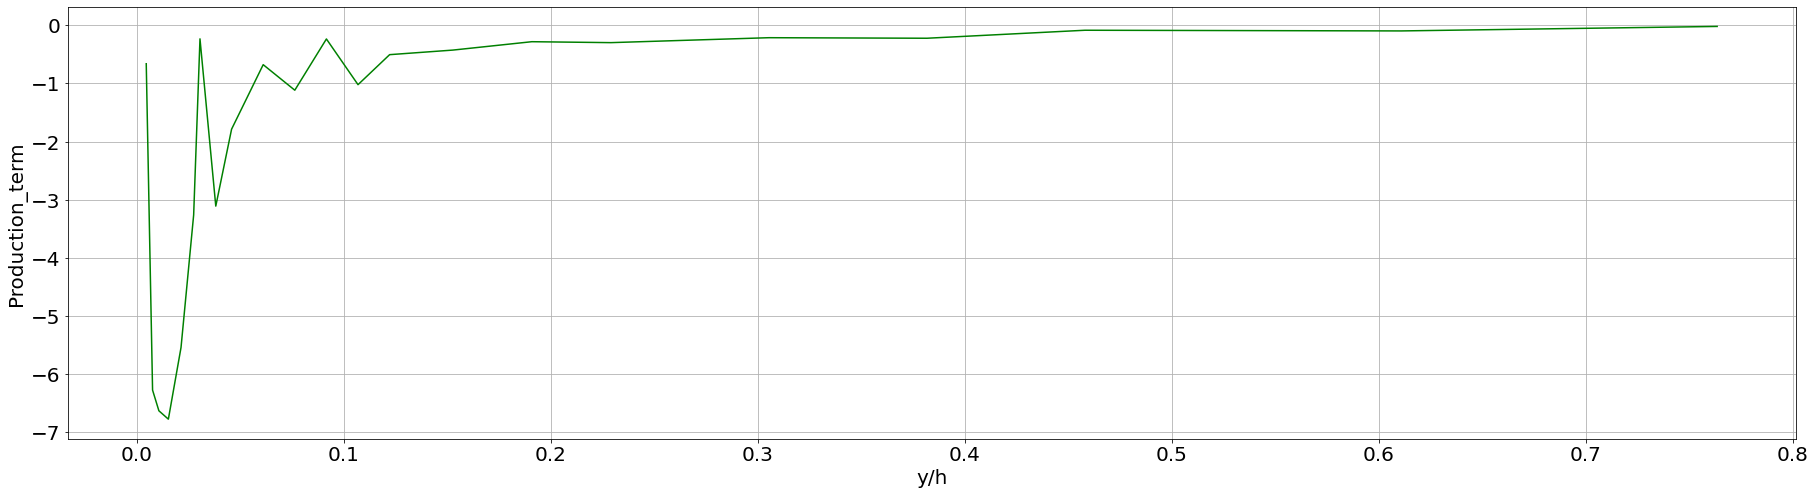

In [157]:
plt.rcParams.update({'font.size': 20})
production_term=-1*dataFrame4.iloc[:,13]*dataFrame4.iloc[:,11]
Figur10=plt.figure()
figureAxes10 = Figur10.add_axes([1,1,4,1.5])
figureAxes10.plot(dataFrame4.iloc[:,2],production_term,"g"); plt.grid()
figureAxes10.set_xlabel("y/h")
figureAxes10.set_ylabel("Production_term")



#11. Experiments show that the transport term (i.e., the summation of the alltransport terms; the convection and diffusion terms in Fig. 2.1) in the energy equation is negligible. With this information, calculate the dissipation, and make an attempt to give a ”picture” for the turbulence energy mechanism.

Text(0, 0.5, 'dissipation_term')

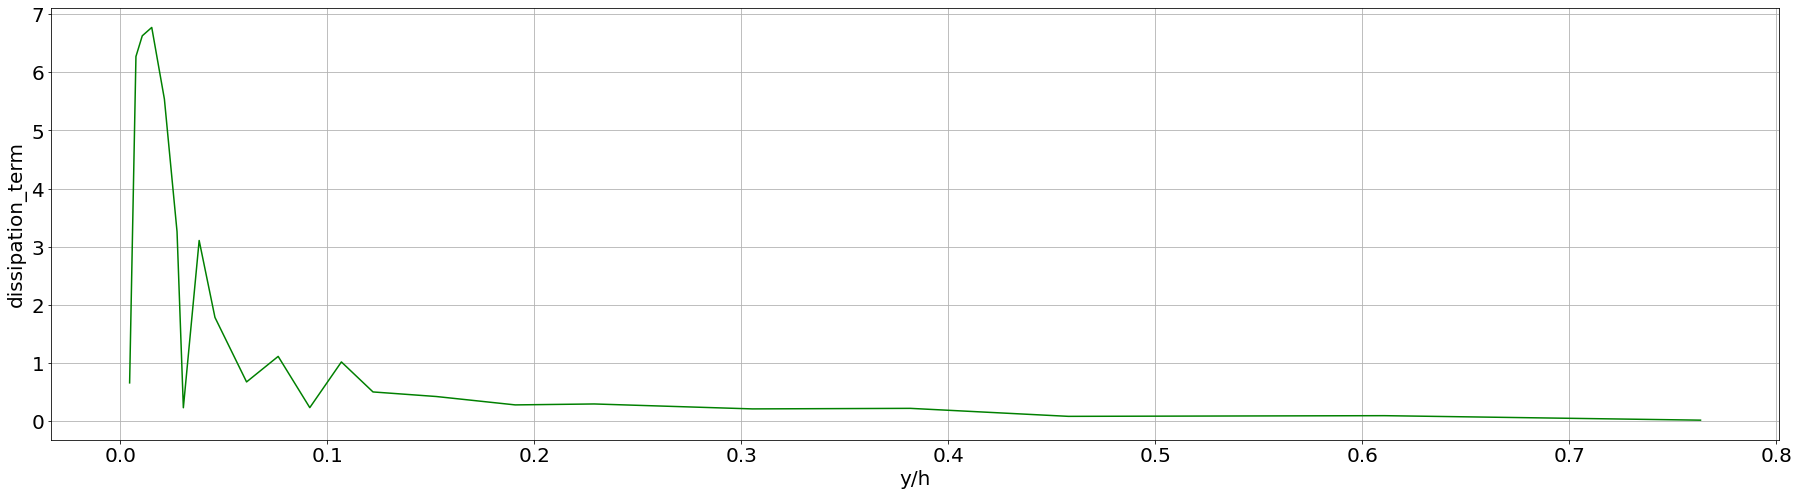

In [158]:
plt.rcParams.update({'font.size': 20})
dissipation_term=-1*production_term #Transport tem is neglible. So dissipation term is equal to minus production term due to energy conservation
Figur11=plt.figure()
figureAxes11 = Figur11.add_axes([1,1,4,1.5])
figureAxes11.plot(dataFrame4.iloc[:,2],dissipation_term,"g"); plt.grid()
figureAxes11.set_xlabel("y/h")
figureAxes11.set_ylabel("dissipation_term")


Production term and distribution term are shown in the same graph to draw a general picture. Transport term is neglected.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0.5, 0, 'y/h')

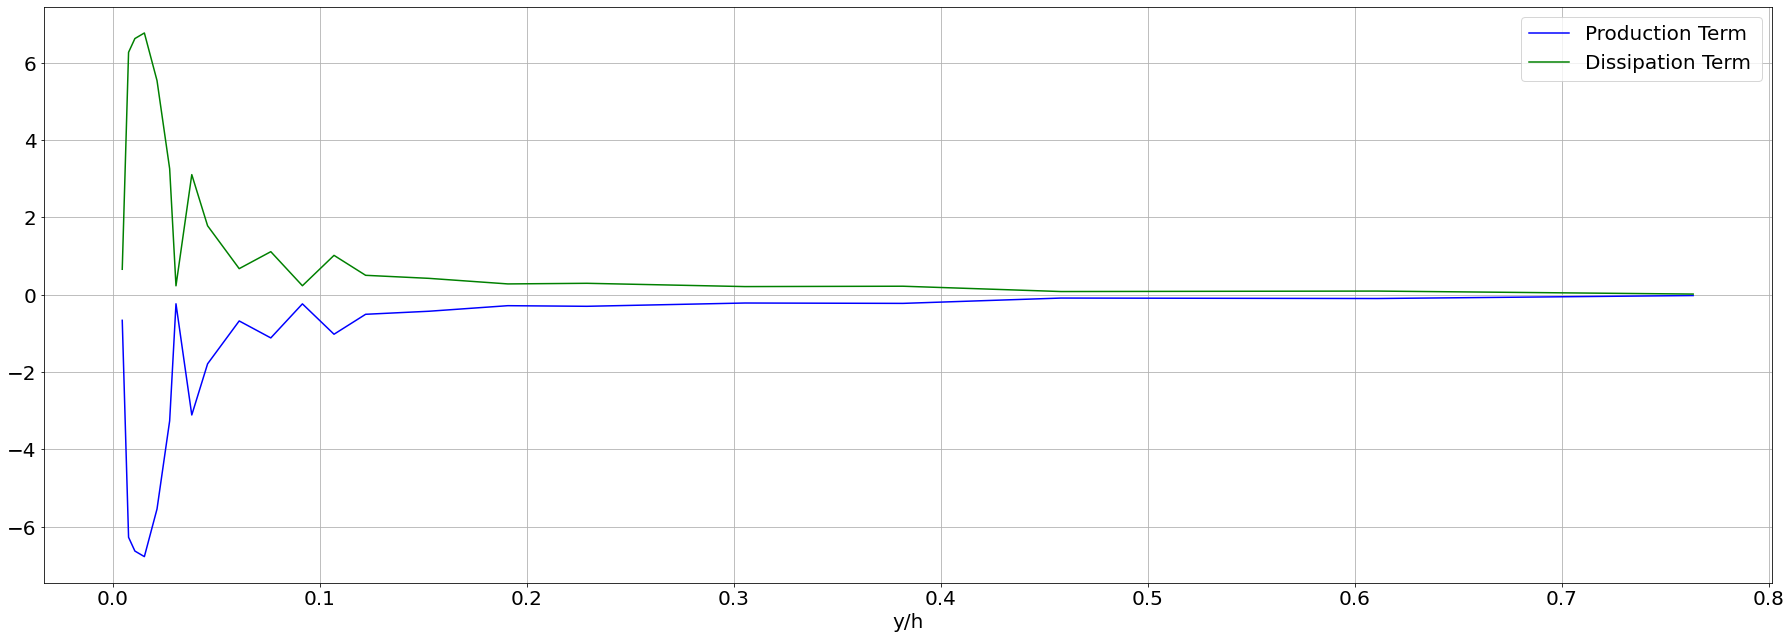

In [159]:
plt.rcParams.update({'font.size': 20})
dissipation_term=-1*production_term #Transport tem is neglible. So dissipation term is equal to minus production term due to energy conservation
Figur111=plt.figure()
figureAxes111 = Figur111.add_axes([1,1,4,2])
figureAxes112 = Figur111.add_axes([1,1,4,2])
figureAxes111.plot(dataFrame4.iloc[:,2],production_term,"b",label='Production Term '); plt.grid()
figureAxes112.plot(dataFrame4.iloc[:,2],dissipation_term,"g",label='Dissipation Term'); 
plt.legend()
figureAxes111.set_xlabel("y/h")


#12. Calculate the mixing length $\ell$ numerically from:$$\frac{\bar{\tau}}{\rho}=\left((\nu+\ \ell^{2}\left|\frac{\partial \bar{u}}{\partial y}\right|) \frac{\partial \bar{u}}{\partial y}\right)$$. Where $\bar{u}$ is the experimentally determined velocity profile. Plot the nondimensional mixing length $\ell$/h as a function of y/h. 

Text(0, 0.5, 'mixing length $\\ell/h$')

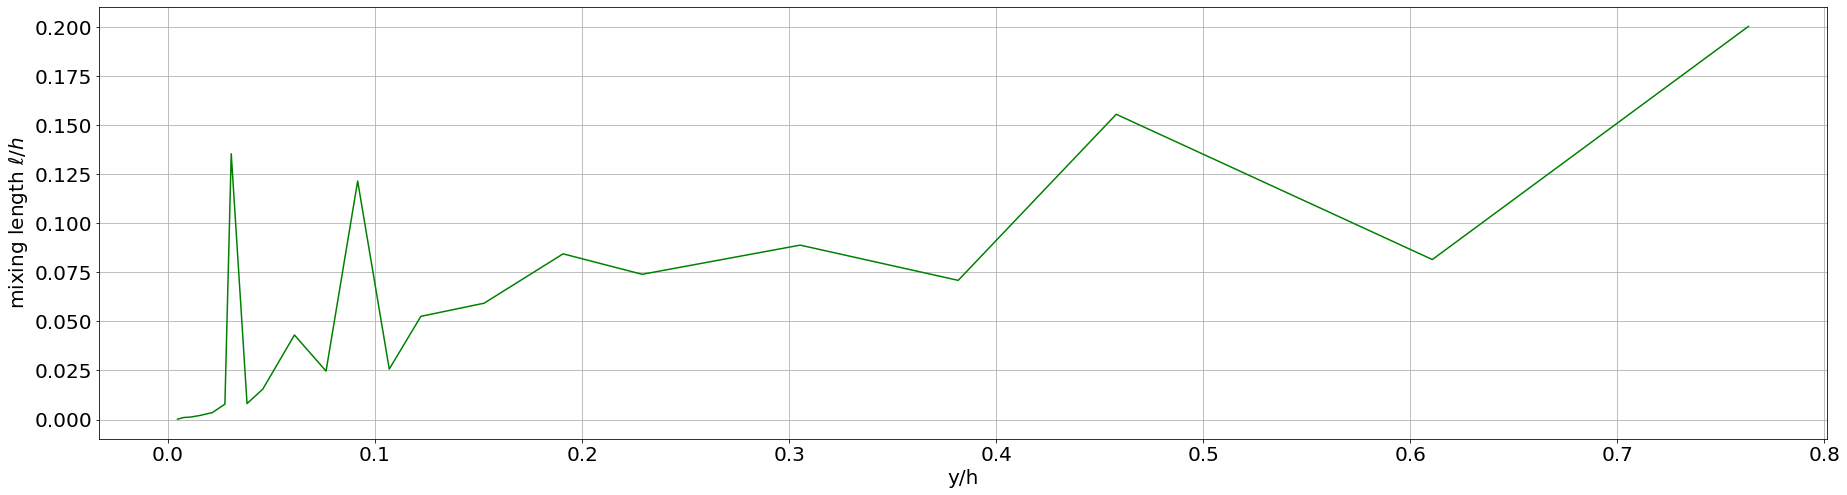

In [160]:
To_mean=dataFrame4.iloc[:,12]
du_dy=dataFrame4.iloc[:,11]
mixinglengthlist=[]
for i in range(0,23):
  mixinglength=(((To_mean[i]/(1000*du_dy[i]))-10**-6)/abs(du_dy[i]))**0.5
  mixinglengthlist.append(mixinglength)

mixinglength=pd.Series( mixinglengthlist)
l_h=mixinglength/water_depth

plt.rcParams.update({'font.size': 20})
Figur12=plt.figure()
figureAxes12 = Figur12.add_axes([1,1,4,1.5])
figureAxes12.plot(dataFrame4.iloc[:,2],l_h,"g"); plt.grid()
figureAxes12.set_xlabel("y/h")
figureAxes12.set_ylabel("mixing length $\ell/h$")

  